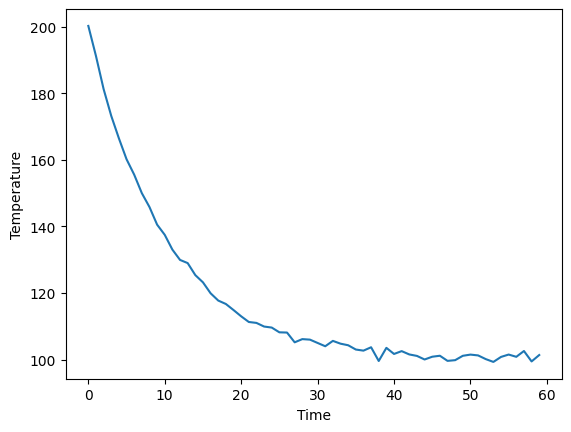

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchdiffeq import odeint, odeint_adjoint
from tqdm import tqdm

K = torch.Tensor([0.1])
T0 = torch.Tensor([100])
x_0 = torch.Tensor([200])
t = torch.arange(0, 60, dtype=torch.float32)

def f(t, x):
    return - K * (x - T0)

sol = odeint(f, y0=x_0, t=t, method='dopri5')
sol = sol + torch.Tensor(np.random.normal(0, 1, sol.shape))
plt.plot(t, sol)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


In [4]:
class f(nn.Module):
    def __init__(self, dim):
        super(f, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(dim, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, dim)
        )
        
    def forward(self, t, x):
        return self.model(x)
    
class ODEBlock(nn.Module):
    def __init__(self, f):
        super(ODEBlock, self).__init__()
        self.f = f
        self.integration_time = torch.Tensor([0, 60]).float()
        
    def forward(self, x):
        self.integration_time = self.integration_time.type_as(x)
        out = odeint_adjoint(self.f, x, self.integration_time, method='dopri5')
        
        return out[1]
    
class ODENet(nn.Module):
    def __init__(self, in_dim, mid_dim, out_dim):
        super(ODENet, self).__init__()
        fx = f(dim=mid_dim)
        self.fc1 = nn.Linear(in_dim, mid_dim)
        self.relu1 = nn.ReLU(inplace=True)
        self.norm1 = nn.BatchNorm1d(mid_dim)
        self.ode_block = ODEBlock(fx)
        self.dropout = nn.Dropout(0.4)
        self.norm2 = nn.BatchNorm1d(mid_dim)
        self.fc2 = nn.Linear(mid_dim, out_dim)
        
    def forward(self, x):
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        
        out = self.fc1(x)
        out = self.relu1(out)
        # out = self.norm1(out)
        out = self.ode_block(out)    
        # out = self.norm2(out)
        out = self.fc2(out)
        
        return out
    
model = ODENet(1, 10, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

LOSS = []
for epoch in tqdm(range(100)):
    model.train()
    optimizer.zero_grad()
    output = model(t)
    loss = criterion(output, sol)
    loss.backward()
    LOSS.append(loss.item())
    optimizer.step()
    # if epoch % 1 == 0:
    #     print('Epoch:', epoch, 'Loss:', loss.item())
        

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
aaaa

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from scipy.integrate import odeint
import matplotlib.pyplot as plt

K = 0.1
T0 =100
x_0 = 200
dt = 0.5

def ode_func(x, t):
    return  - K * (x - T0)

# Solve ODE 
t = np.arange(0, 60, dt)
sol = odeint(ode_func, x_0, t)
sol = [x + np.random.normal(0,1) for x in sol] 

# Plot
plt.figure(figsize=(5, 3))
plt.plot(t, sol, label='T(t)')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Torch ANN with 2 inputs, 1 output and a hidden layer with 10 nodes
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.input = nn.Linear(2, 10)
        self.hidden = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.input(x))
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x
    
# Initialize ANN instance
ann = Net()
params = list(ann.parameters())

